# Document information

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Basic graphics for a single-column data file</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2018-06-24</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-06-22</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">basic_graphics_single_column.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">basic_statistics_single_column_data.csv</td>
    </tr>
</table>

# Introduction

The purpose of this Jupyter notebook is to illustrate a basic notebook structure. The script reads a single-column file and calculates basic graphics. It progresses from quick-and-dirty code to pretty.

# Import librairies and basic setup

In [1]:
# Import the Python pandas library. Give it a shortcut name of "pd".
# This library contains the methods required to perform the analysis.
import pandas as pd

In [21]:
# Add the "magic function" to render figures in a Jupyter notebook.
%matplotlib inline

# Read the data file

The data file has one column labelled "y". It is saved as a CSV format with UTF-8 encoding.

In [3]:
# Read the data file and save it to a dataframe called "df".
df = pd.read_csv('basic_statistics_single_column_data.csv')

In [4]:
# View the first five rows of data.
df.head(5)

,y
0,61.285093
1,71.414479
2,75.356495
3,54.584659
4,65.031903


In [5]:
# View the last five rows of data.
df.tail(5)

,y
45,74.690169
46,91.034409
47,79.701784
48,48.918434
49,71.215380


# Perform the analysis

## Box plot

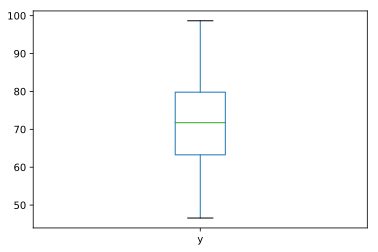

In [6]:
# Create a box plot.
df['y'].plot.box()

In [7]:
# The horizontal lines, from top to bottom, are:
# - Maximum
# - Third quartile
# - Median
# - First quartile
# - Minimum

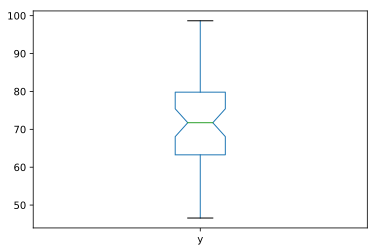

In [8]:
# Add the 95 % confidence interval of the median.
df['y'].plot.box(notch=True)

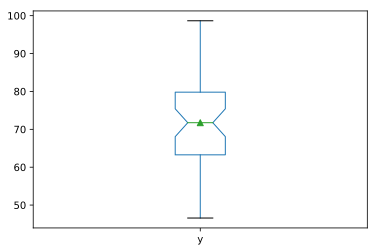

In [9]:
# Add the average.
df['y'].plot.box(notch=True, showmeans=True)

In [10]:
# Print the statistics of the box plot.
print('Maximum',
      df.max(),
      sep=" = ")
print('Third quartile',
      df.quantile(.75),
      sep=" = ")
print('Median',
      df.median(),
      sep=" = ")
print('Average',
      df.mean(),
      sep=" = ")
print('First quartile',
      df.quantile(.25),
      sep=" = ")
print('Minimum',
      df.min(),sep=" = ")

Maximum = y    98.642938
dtype: float64
Third quartile = y    79.806678
Name: 0.75, dtype: float64
Median = y    71.739657
dtype: float64
Average = y    71.736964
dtype: float64
First quartile = y    63.270518
Name: 0.25, dtype: float64
Minimum = y    46.574791
dtype: float64


In [22]:
df.max()

y    98.642938
dtype: float64

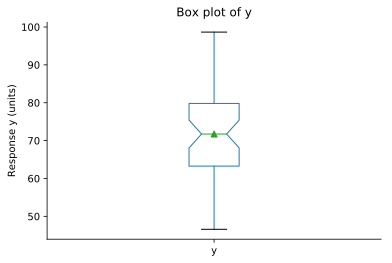

In [11]:
# Remove axes and add labels.
ax = df['y'].plot.box(notch=True, showmeans=True)
ax.set_title('Box plot of y')
ax.set_ylabel('Response y (units)')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

## Histogram

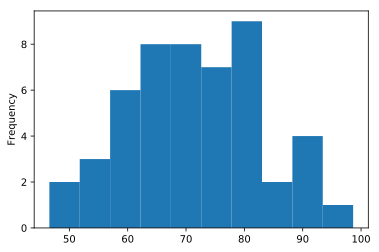

In [12]:
# Create a histogram.
df['y'].plot.hist()

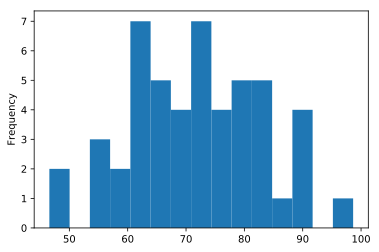

In [13]:
# Change the number of bins.
df['y'].plot.hist(bins=15)

# Scatter plot

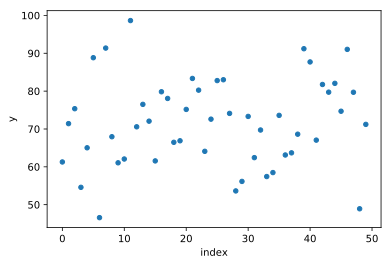

In [14]:
# Create a scatter plot, assuming data are in time order.
df.reset_index().plot.scatter(x='index', y='y')

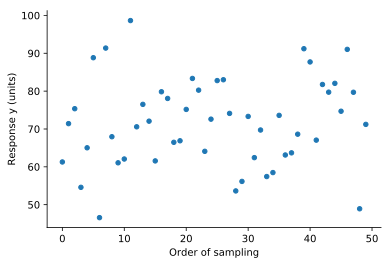

In [15]:
# Clean it up.
ax = df.reset_index().plot.scatter(x='index', y='y')
ax.set_ylabel('Response y (units)')
ax.set_xlabel('Order of sampling')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

# Stem-and-leaf plot

Import the stemgraphic library in order to do this.

In [16]:
from stemgraphic import stem_graphic

/usr/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(<Figure size 540x1008 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f7c55d5def0>)

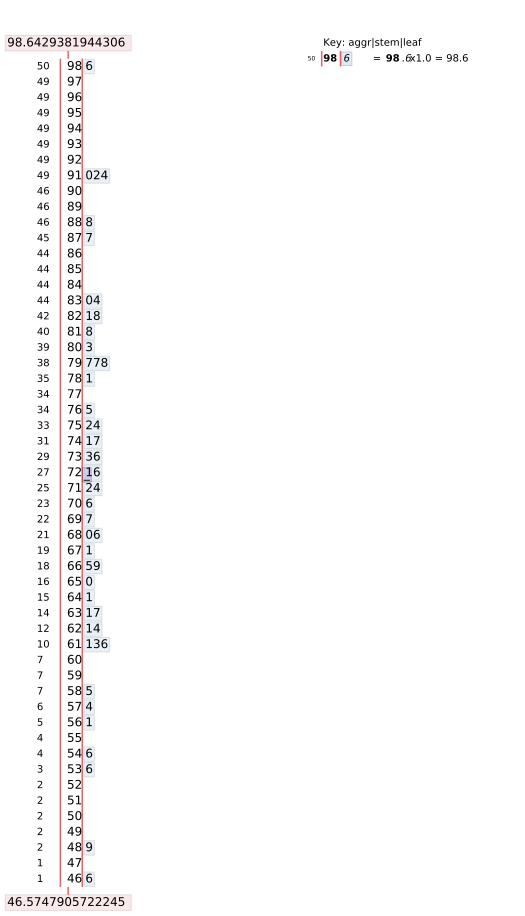

In [17]:
stem_graphic(df['y'])

# Run chart

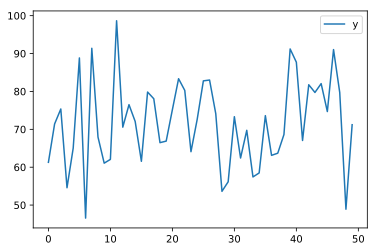

In [18]:
# Plot a run chart, using the index for x.
df.plot()

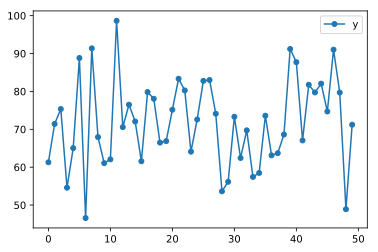

In [19]:
# Add markers that are circles and of a certain size.
df.plot(marker='o', markersize=5)

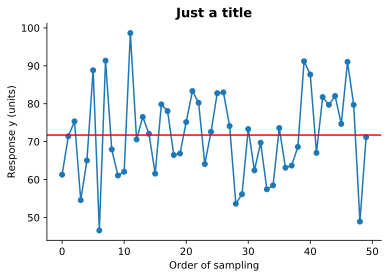

In [24]:
# Clean it up. Add a red line for the average.
ax = df.plot(marker='o', markersize=5, legend=False)
ax.axhline(y=df['y'].mean(), color='r')
ax.set_ylabel('Response y (units)')
ax.set_xlabel('Order of sampling')
ax.set_title('Just a title', fontweight='bold', fontsize=13)
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

# References

[pandas API](https://pandas.pydata.org/pandas-docs/stable/api.html)

[stemgraphic](http://stemgraphic.org/doc/index.html)